C:\Users\Home-User\AppData\Local\Temp\ipykernel_14132\528013217.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Product', palette='viridis', order=df['Product'].value_counts().index)


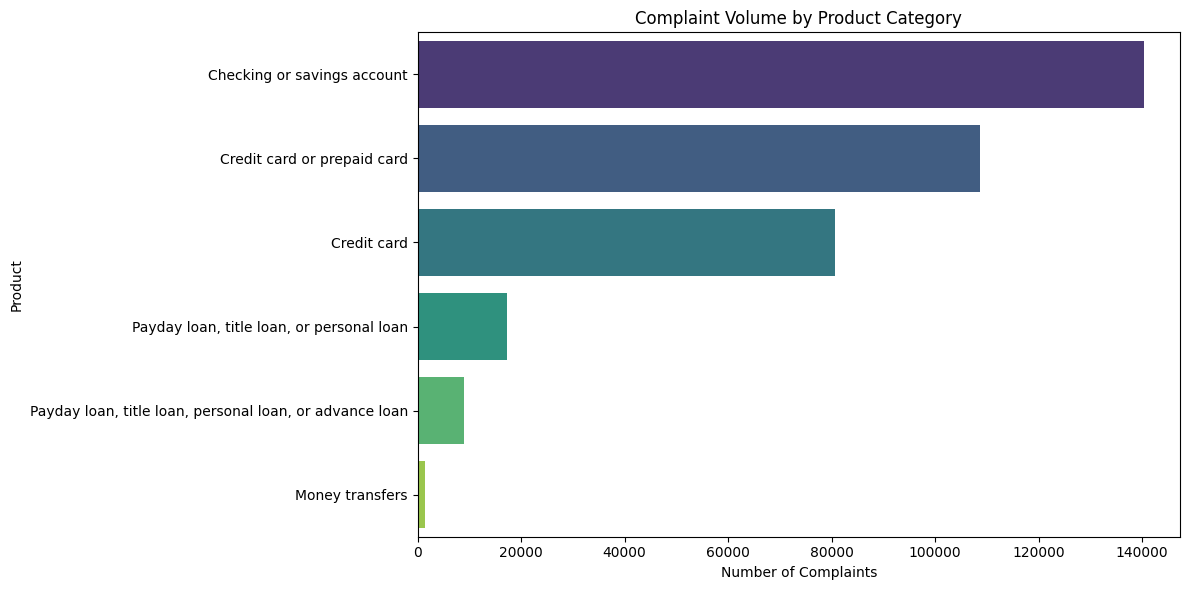

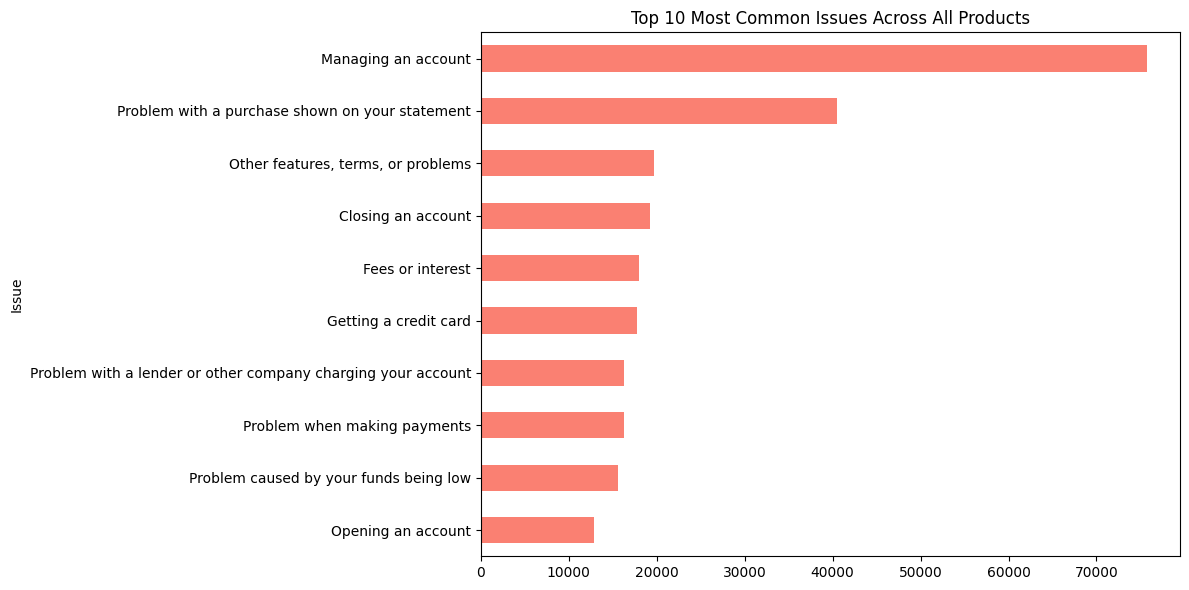

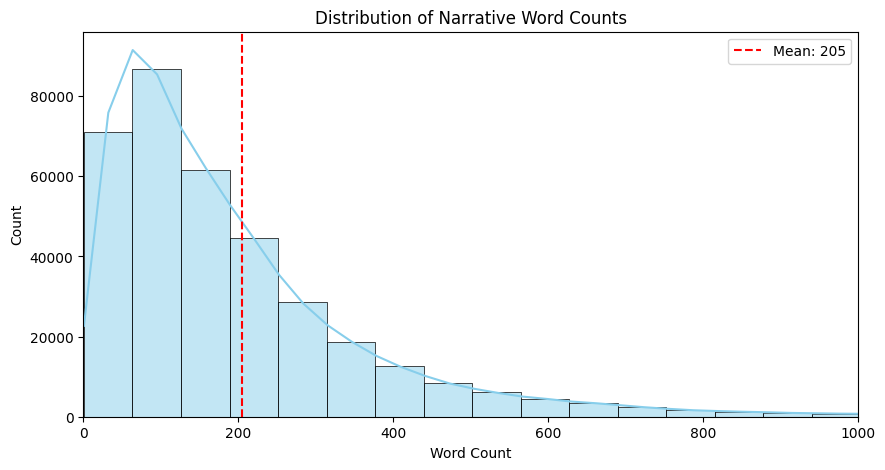

Summary Statistics for Word Count:
count    357281.000000
mean        204.722524
std         219.728850
min           1.000000
25%          76.000000
50%         146.000000
75%         259.000000
max        6263.000000
Name: word_count, dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
df = pd.read_csv('../data/processed/filtered_complaints.csv')

# --- 1. Product Distribution ---
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Product', palette='viridis', order=df['Product'].value_counts().index)
plt.title('Complaint Volume by Product Category')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig('../data/processed/product_distribution.png')
plt.show()

# --- 2. Top 10 Issues ---
plt.figure(figsize=(12, 6))
df['Issue'].value_counts().head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Most Common Issues Across All Products')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- 3. Narrative Length Analysis ---
# We calculate word count to determine our chunking strategy for Task 2
df['word_count'] = df['cleaned_narrative'].str.split().str.len()

plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=100, color='skyblue', kde=True)
plt.axvline(df['word_count'].mean(), color='red', linestyle='--', label=f"Mean: {df['word_count'].mean():.0f}")
plt.title('Distribution of Narrative Word Counts')
plt.xlabel('Word Count')
plt.xlim(0, 1000) # Limiting x-axis to see the bulk of the data
plt.legend()
plt.show()

print(f"Summary Statistics for Word Count:")
print(df['word_count'].describe())

EDA Insight for Asha
Mean Word Count (~205 words): Since the average complaint is about 200 words, our 500-character chunk size (approx. 70-100 words) is a perfect choice. It ensures that each chunk is small enough to be highly specific but large enough to contain a complete thought, satisfying Asha's need for "synthesized, evidence-backed answers".

Scale (357,281 records): we are dealing with a massive volume of data. The "minutes to identify a trend" KPI will be easily met by your FAISS index, which can search these hundreds of thousands of records in milliseconds.